<a href="https://colab.research.google.com/github/junhaogu/zlineSegment/blob/master/MODEL_TRAINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! kill -9 -1

In [0]:
%%bash
git clone https://github.com/junhaogu/zlineSegment.git

Cloning into 'zlineSegment'...
Checking out files: 100% (4563/4563), done.


In [0]:
cd /content/zlineSegment

/content/zlineSegment


cuda:0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
5100
6800
8500


Downloading: "https://github.com/mateuszbuda/brain-segmentation-pytorch/archive/master.zip" to /root/.cache/torch/hub/master.zip


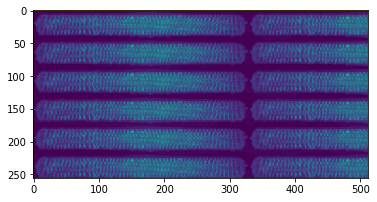

In [0]:
%load readimagefiles.py
from readimagefiles import read_single_cell_image
%load unet5block.py
from unet5block import unet5block
%load cross_valid.py
from cross_valid import cross_val

import torch

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

para={}
para['save_path'] = "/content/zlineSegment"
para['batch_size'] = 20
para['learning_rate'] = 0.001
para['num_epochs'] = 300
para['resume']=-1
para['dice_weight']=0.5
para['unet_init_kernel']=32
para['block']=4
para['device']=device
sample_data, mask=read_single_cell_image('/content/zlineSegment/overlay','/content/zlineSegment/mask')
if para['block']==4:
  model= torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet', in_channels=3, out_channels=1, init_features=para['unet_init_kernel'], pretrained=False)
else:
  model= unet5block(in_channels=3, out_channels=1, init_features=para['unet_init_kernel'])



In [0]:
cross_val(kf=5,sample_data=sample_data, mask_data=mask, model=model, para=para)

fold: 0
cuda:0
Epoch [1/300], training error: 0.9119, validation Loss: 0.8947
Epoch [2/300], training error: 0.6602, validation Loss: 0.6548
Epoch [3/300], training error: 0.5721, validation Loss: 0.5849
Epoch [4/300], training error: 0.5608, validation Loss: 0.5692
Epoch [5/300], training error: 0.5457, validation Loss: 0.5498
Epoch [6/300], training error: 0.5244, validation Loss: 0.5472
Epoch [7/300], training error: 0.5265, validation Loss: 0.5332
Epoch [8/300], training error: 0.5218, validation Loss: 0.5222
Epoch [9/300], training error: 0.5078, validation Loss: 0.5150
Epoch [10/300], training error: 0.4987, validation Loss: 0.5075
Epoch [11/300], training error: 0.4812, validation Loss: 0.4964
Epoch [12/300], training error: 0.4758, validation Loss: 0.4949
Epoch [13/300], training error: 0.4548, validation Loss: 0.4652
Epoch [14/300], training error: 0.4457, validation Loss: 0.4494
Epoch [15/300], training error: 0.4222, validation Loss: 0.4243
Epoch [16/300], training error: 0.